In [1]:
import sys, os
import numpy as np
from tqdm import tqdm
import glob

import matplotlib.pyplot as plt
import tikzplotlib

working_path = os.path.join(os.path.dirname(os.getcwd()), '')
parent_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), '')

sys.path.append(working_path)
sys.path.append(parent_path)

In [2]:
mae_file_path = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/exp3"
files_prefix = "STLSTM_t32_d_"
files = glob.glob(os.path.join(mae_file_path, files_prefix + "*"))

os.path.basename(files[0])

'STLSTM_t32_d_16_Y_test_00.npy'

In [3]:
MAE = dict()
for file in files:
    basename = os.path.basename(file)
    MAE[basename] = np.load(file)[0]
    
MAE

{'STLSTM_t32_d_16_Y_test_00.npy': 0.17153488,
 'STLSTM_t32_d_24_Y_test_00.npy': 0.34416214,
 'STLSTM_t32_d_20_Y_test_00.npy': 0.27158257,
 'STLSTM_t32_d_4_Y_test_00.npy': 0.022650605,
 'STLSTM_t32_d_6_Y_test_00.npy': 0.19172458,
 'STLSTM_t32_d_7_Y_test_00.npy': 0.25636694,
 'STLSTM_t32_d_0_Y_test_00.npy': 0.013739127,
 'STLSTM_t32_d_1_Y_test_00.npy': 0.19592762,
 'STLSTM_t32_d_5_Y_test_00.npy': 0.23492338,
 'STLSTM_t32_d_8_Y_test_00.npy': 0.045662243,
 'STLSTM_t32_d_3_Y_test_00.npy': 0.1873198,
 'STLSTM_t32_d_28_Y_test_00.npy': 0.36539707,
 'STLSTM_t32_d_2_Y_test_00.npy': 0.1990891}

In [17]:
def fromDict2Point(number):
    for key, values in MAE.items():
        if f"_{number}_" in key:
            #print(key)
            return MAE[key]
    return 0

In [18]:
series = [fromDict2Point(num) for num in range(32)]

<IPython.core.display.Javascript object>


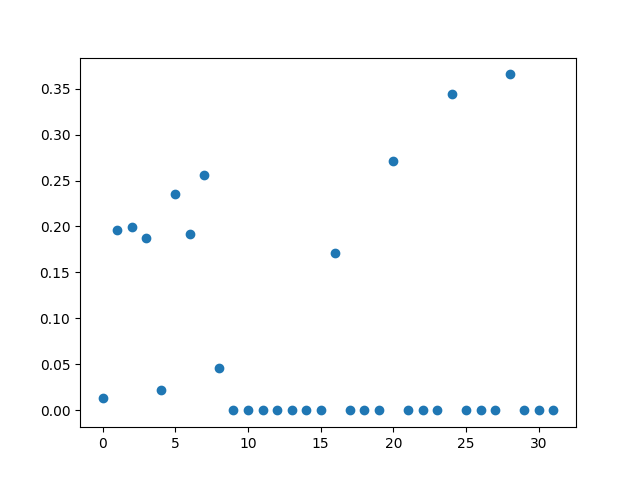

In [22]:
%matplotlib notebook
plt.style
plt.scatter(range(32),series)